# Problem Statement:

### Creating a bar graph or histogram to visualise the distribution of a categorical or continous variable , such a the distribution of ages or genders in a population.

## Dataset Link:
https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

#### Import Required Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

#### Load CSV File 

In [15]:
df = pd.read_csv('jobs_in_data.csv')

#### Displaying First Five Records

In [17]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


#### Displaying Last Five Records

In [19]:
df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


#### Number of Rows & Columns

In [22]:
df.shape

(9355, 12)

#### Name of Columns 

In [24]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### Types of Columns

In [43]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

#### Information about Dataset 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 542.4+ KB


### Exploratory Data Analysis (EDA)

#### Checking Null Values  

In [26]:
df.isnull().any()

work_year             False
job_title             False
job_category          False
salary_currency       False
salary                False
salary_in_usd         False
employee_residence    False
experience_level      False
employment_type       False
work_setting          False
company_location      False
company_size          False
dtype: bool

#### Checking Duplicate Values 

In [32]:
df.duplicated().any()

True

#### Sum of Dupliacte Values

In [34]:
df.duplicated().sum()

4014

#### Dropping Duplicate Records

In [40]:
df = df.drop_duplicates()

#### Basic Statistics 

In [47]:
df.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


### Data Visualisation 

#### CountPlot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Data Science and Research'),
  Text(1, 0, 'Data Engineering'),
  Text(2, 0, 'Machine Learning and AI'),
  Text(3, 0, 'Data Analysis'),
  Text(4, 0, 'Leadership and Management'),
  Text(5, 0, 'BI and Visualization'),
  Text(6, 0, 'Data Architecture and Modeling'),
  Text(7, 0, 'Data Management and Strategy'),
  Text(8, 0, 'Data Quality and Operations'),
  Text(9, 0, 'Cloud and Database')])

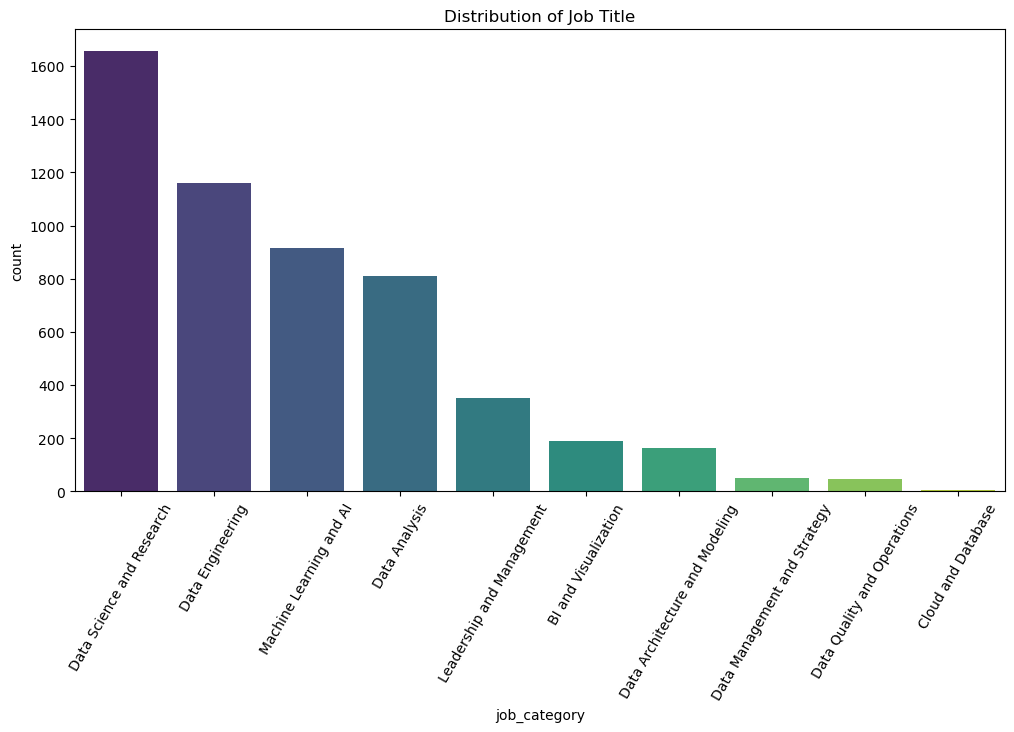

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(x='job_category' , data=df,palette='viridis',order=df['job_category'].value_counts().index)
plt.title('Distribution of Job Title')
plt.xticks(rotation=60)